In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# check null value

In [3]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

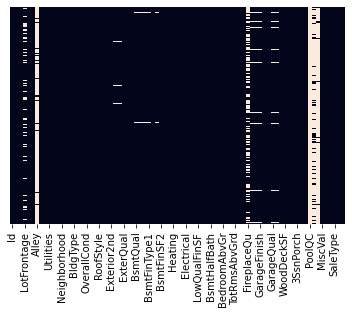

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [5]:
# drop columns which has more than 50% null value
#  fill object value by mode and intiger,float value by mean
def null_check():
    for i in df.columns:
        if ((df[i].isnull().sum()*100/len(df[i]))>50):
            df.drop([i],axis=1,inplace=True)
        elif(df[i].dtypes=='object'):
            df[i]=df[i].fillna(df[i].mode()[0])
        elif(df[i].dtypes=='int'):
            df[i]=df[i].fillna(df[i].mean())
        elif(df[i].dtypes=='float'):
            df[i]=df[i].fillna(df[i].mean())

In [6]:
null_check()

In [7]:
df.shape

(1460, 77)

In [8]:
sum(df.isnull().any())

0

# encoding data

In [9]:
from sklearn.preprocessing import LabelEncoder
def encod():
    for i in df.columns:
        if(df[i].dtypes=='object'):
            df[i]=LabelEncoder().fit_transform(df[i])
encod()

In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


# check duplicate

In [11]:
#check duplicate 
df.duplicated().sum()

0

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

# outlier handling

In [13]:
for i in df.columns:
    print(df[i].skew())

0.0
1.4076567471495591
-1.7353953794159185
2.3849501679427925
12.207687851233496
-15.518769523446206
-0.6101746987339194
-3.1624994215215674
38.20994634908561
-1.1356318684354358
4.813682424489448
0.04212153010649173
3.019195845658257
13.171843951308416
2.2456480122431524
0.30675459298372293
0.2169439277628693
0.6930674724842182
-0.613461172488183
-0.5035620027004709
1.4737963742380578
8.109402021334287
-0.7263135664402056
-0.6929626745550399
-0.07362707908591301
2.676411784729959
-1.8302652187854904
-2.5653047441855623
0.0912173792095914
-1.3442884476508372
-3.4565047417484287
-1.1893763184216957
-0.06102923235312584
1.685503071910789
-3.6291444376285407
4.255261108933303
0.9202684528039037
1.5242545490627664
9.855100422795239
0.48321820794829046
-3.530385595692418
-3.063134383093449
1.3767566220336365
0.8130298163023265
9.011341288465387
1.3665603560164552
0.596066609663168
4.103402697955168
0.036561558402727165
0.675897448233722
0.21179009627507137
4.488396777072859
-1.4228077652402

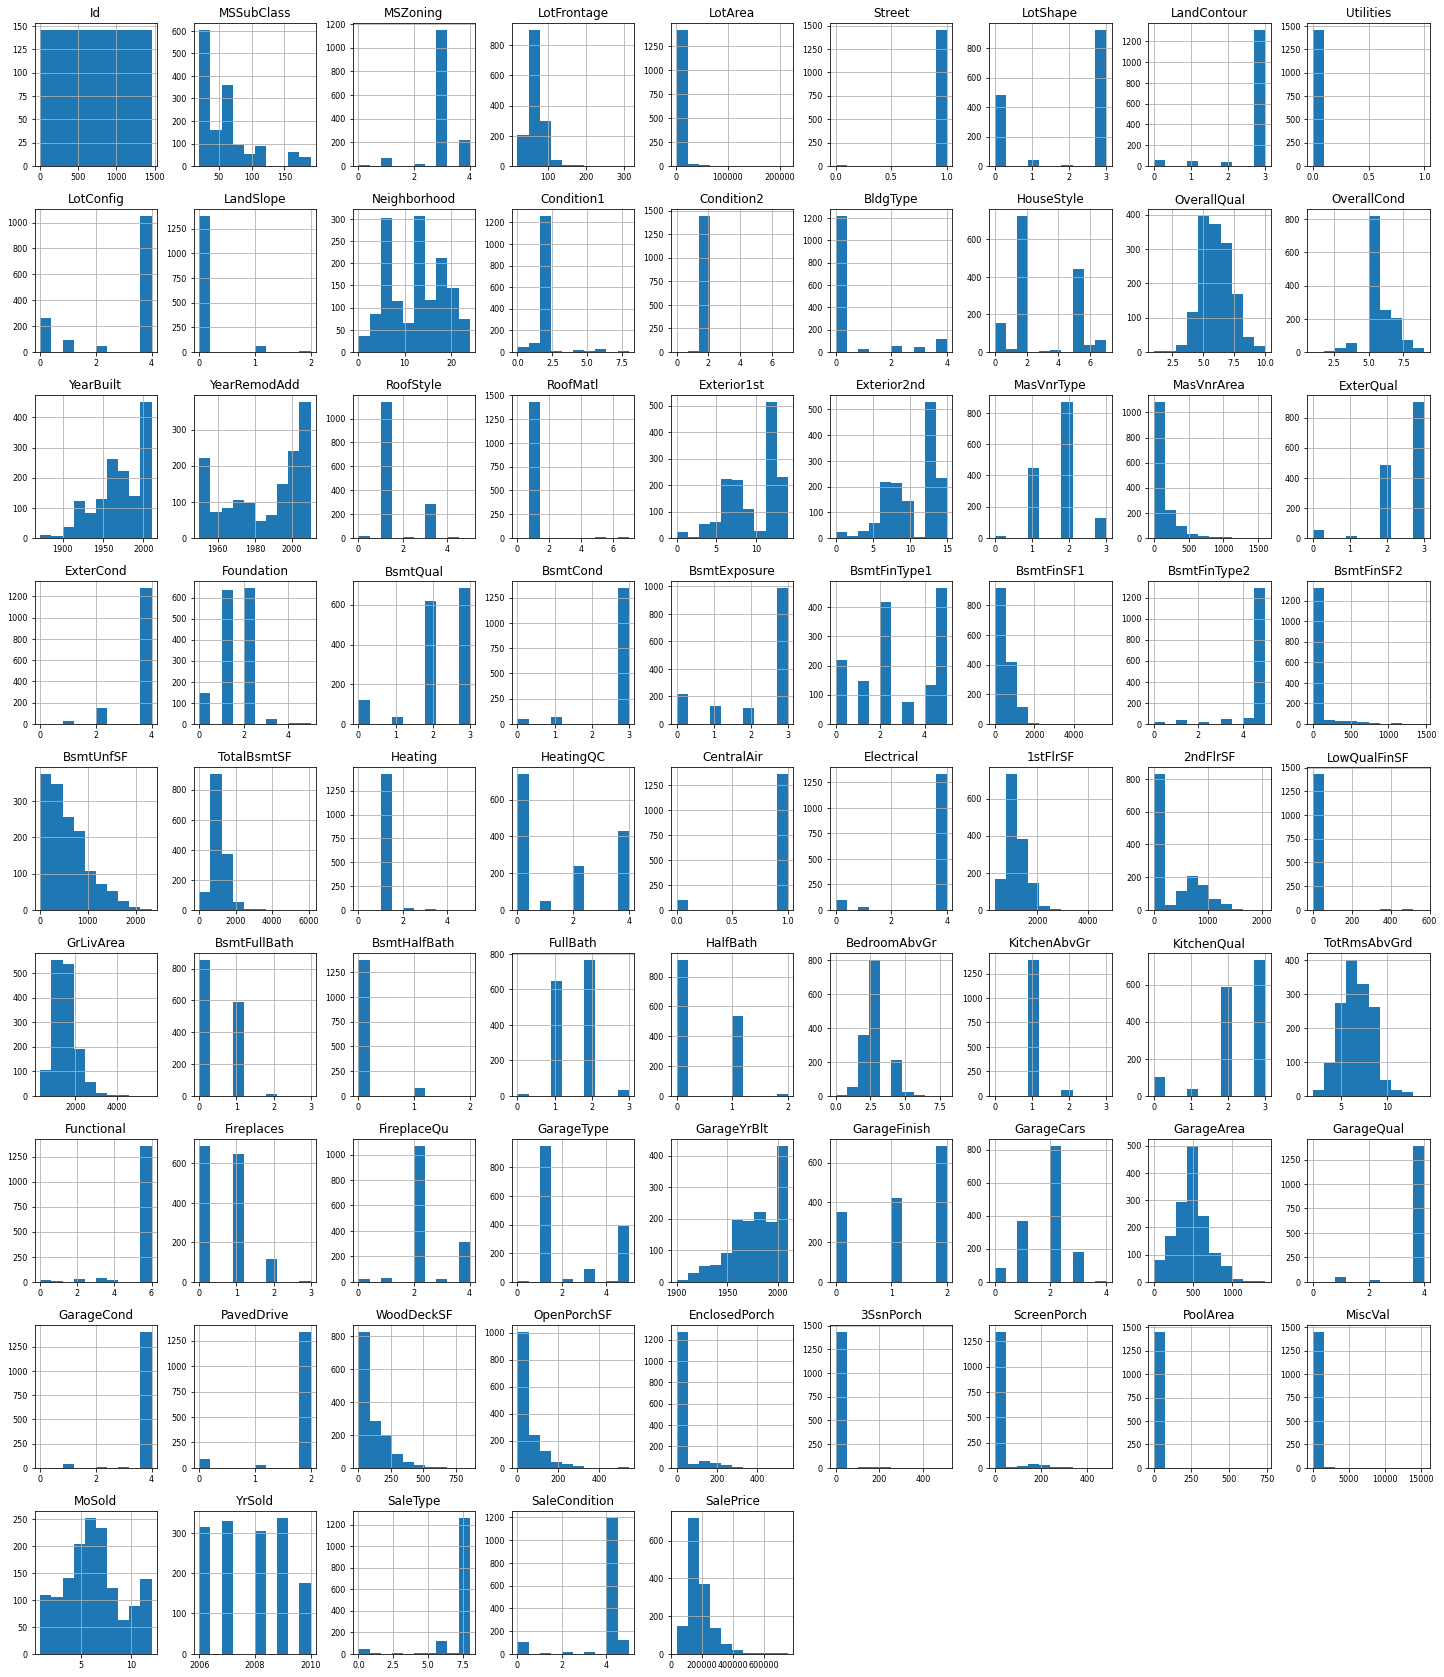

In [14]:
df.hist(figsize=(25, 30), xlabelsize=8, ylabelsize=8)
plt.show()

In [15]:
df.drop(['Id'],axis=1,inplace=True)

In [16]:
def outlier_detection(df):
    for i in df.columns:
        if(df[i].skew()==0.00):
            mean=np.mean(df[i])
            std=np.std(df[i])
            for y in df[i]:
                z=(y-mean)/std
                if z>3 or z<-3:
                    df=df[df[i]!=y]
                return df
        else:
            q1=df[i].quantile(q=0.25)
            q3=df[i].quantile(q=0.75)
            iqr=q1-q3
            lower_bond=q1-(1.5*iqr)
            upper_bond=q3+(1.5*iqr)
            for j in df[i]:
                if(j<lower_bond or j>upper_bond):
                    df=df[df[i]!=j]
                return df

In [17]:
df=outlier_detection(df)

In [18]:
df.shape

(1161, 76)

In [19]:
df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,...,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,56.098191,3.078381,67.869502,10119.900086,0.994832,2.076658,2.752799,0.000861,3.066322,0.066322,...,25.353144,3.413437,14.578811,2.130922,49.968992,6.281654,2007.838071,7.474591,3.711456,165719.503876
std,47.407122,0.640492,21.434939,10675.280770,0.071733,1.368418,0.749743,0.029348,1.602233,0.284504,...,64.844477,30.027739,53.984409,36.591832,551.988892,2.699760,1.329881,1.685511,1.153831,69876.735472
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7100.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,124000.000000
50%,30.000000,3.000000,70.000000,9098.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,147000.000000
75%,80.000000,3.000000,76.000000,11249.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,189000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,611657.000000


In [20]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std_data1=std.fit_transform(df.drop(['SalePrice'],axis=1))

In [21]:
std_data1

array([[-0.76177895, -0.12242844,  0.56616561, ..., -0.63045618,
         0.31185523,  0.25018287],
       [ 0.29336942, -0.12242844, -0.36729255, ..., -1.38272712,
         0.31185523, -3.21802383],
       [-0.12868993, -0.12242844,  0.79953015, ...,  0.8740857 ,
         0.31185523,  0.25018287],
       ...,
       [ 0.29336942, -0.12242844, -0.08725511, ...,  1.62635664,
         0.31185523,  0.25018287],
       [-0.76177895, -0.12242844,  0.00609071, ...,  1.62635664,
         0.31185523,  0.25018287],
       [-0.76177895, -0.12242844,  0.33280107, ...,  0.12181476,
         0.31185523,  0.25018287]])

# test data set 

In [22]:
#read data set 
df1=pd.read_csv('test.csv')
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [23]:
#check null value
df1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

<AxesSubplot:>

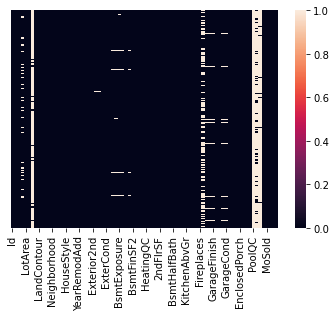

In [25]:
sns.heatmap(df1.isnull(),yticklabels=False)

In [26]:
# drop columns which has more than 50% null value
#  fill object value by mode and intiger,float value by mean
def null_check():
    for i in df1.columns:
        if ((df1[i].isnull().sum()*100/len(df1[i]))>50):
            print(df1.drop([i],axis=1,inplace=True))
        elif(df1[i].dtypes=='object'):
            df1[i]=df1[i].fillna(df1[i].mode()[0])
        elif(df1[i].dtypes=='int'):
            df1[i]=df1[i].fillna(df1[i].mean())
        elif(df1[i].dtypes=='float'):
            df1[i]=df1[i].fillna(df1[i].mean())

In [27]:
null_check()

None
None
None
None
None


In [28]:
df1.shape

(1459, 75)

In [29]:
sum(df1.isnull().any())

0

# encoding data

In [30]:
from sklearn.preprocessing import LabelEncoder
def encod():
    for i in df1.columns:
        if(df1[i].dtypes=='object'):
            df1[i]=LabelEncoder().fit_transform(df1[i])
encod()

In [31]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4


In [32]:
df1.drop(['Id'],axis=1,inplace=True)
df1.shape

(1459, 74)

# check duplicate

In [33]:
df1.duplicated().any()

False

# remove outliers

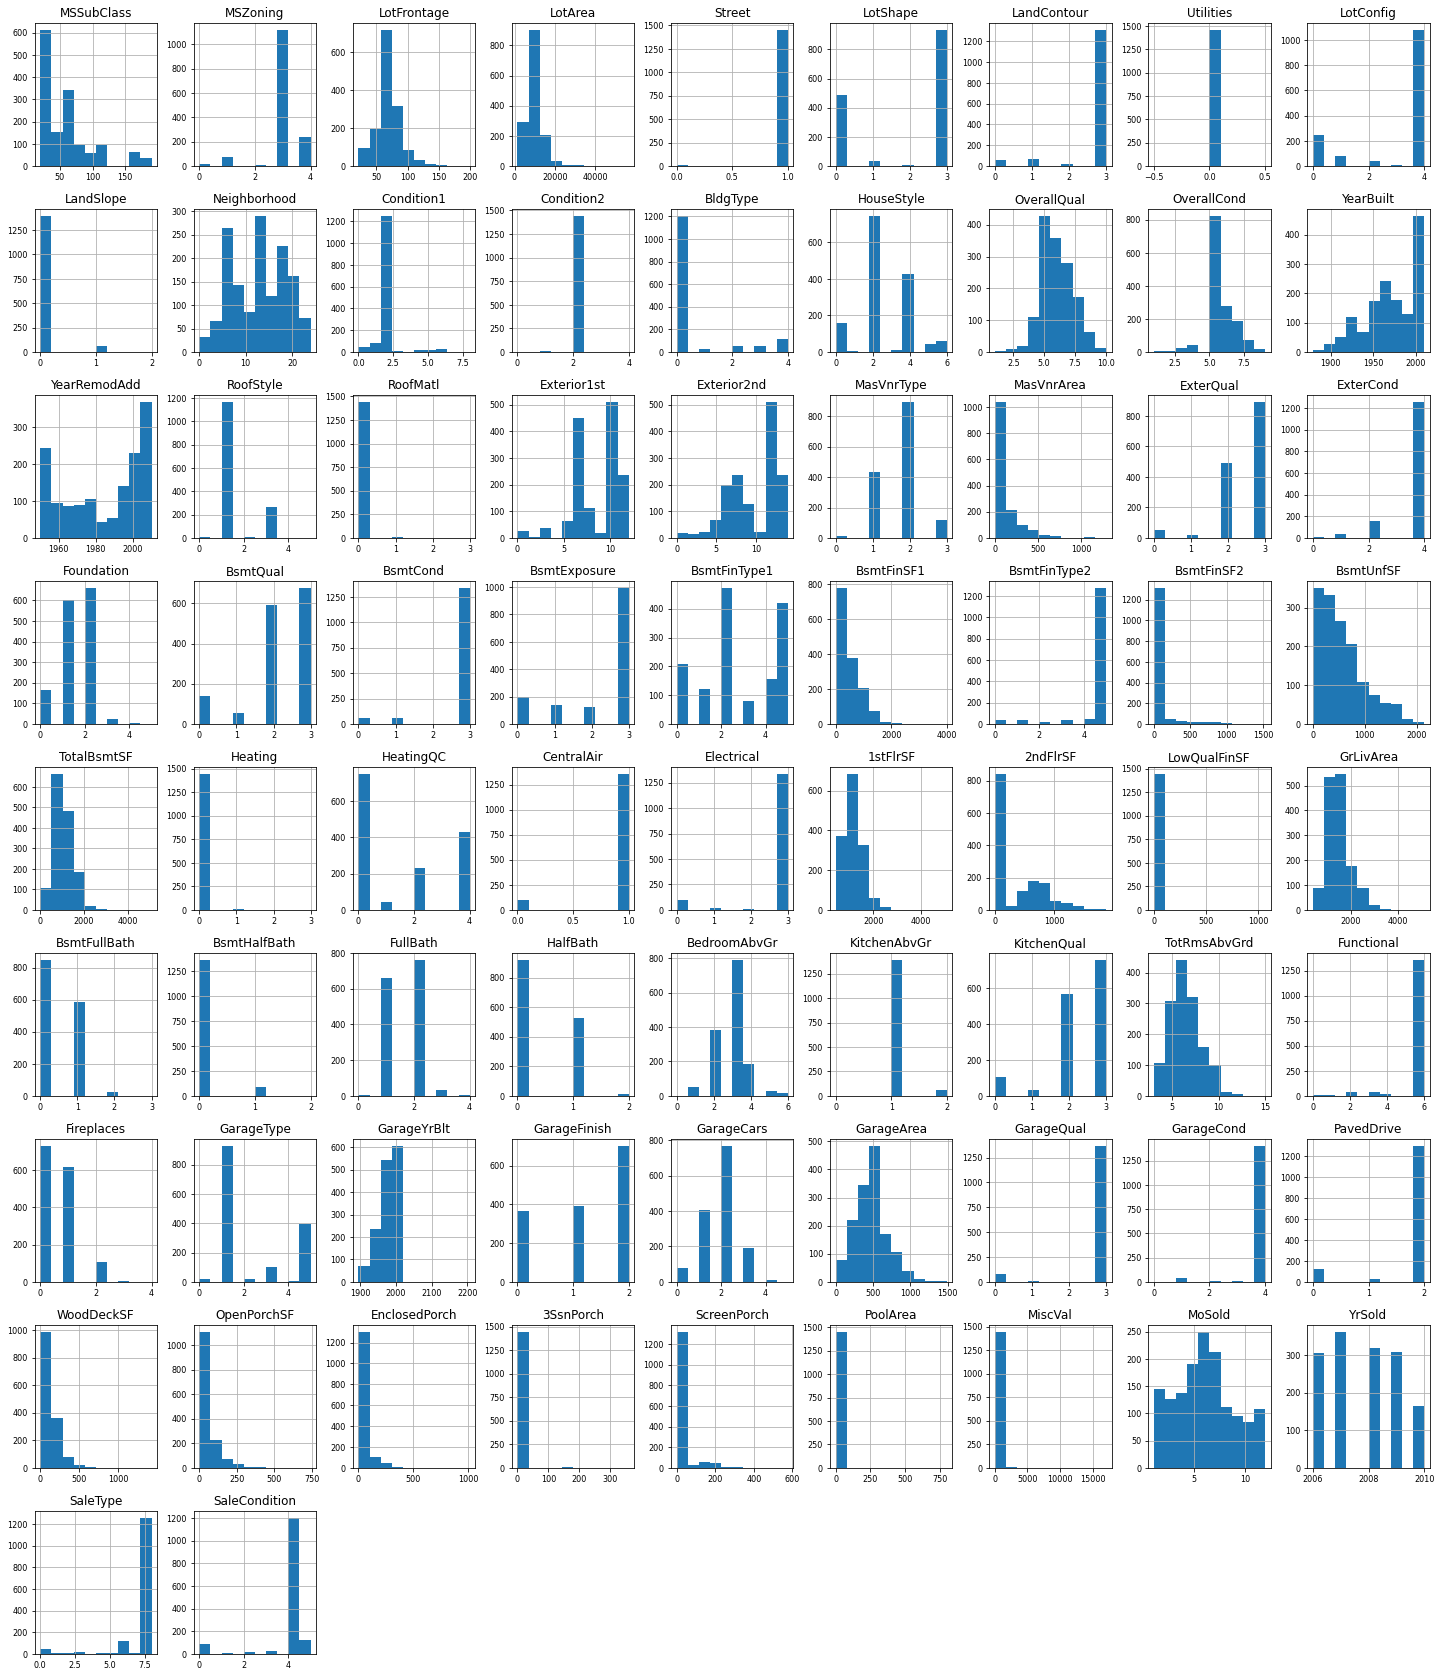

In [34]:
df1.hist(figsize=(25, 30), xlabelsize=8, ylabelsize=8)
plt.show()

In [35]:
def outlier_detection(df1):
    for i in df1.columns:
        if(df1[i].skew()==0.00):
            mean=np.mean(df1[i])
            std=np.std(df1[i])
            for y in df1[i]:
                z=(y-mean)/std
                if z>3 or z<-3:
                    df1=df1[df1[i]!=y]
                    return df1
        else:
            q1=df1[i].quantile(q=0.25)
            q3=df1[i].quantile(q=0.75)
            iqr=q1-q3
            lower_bond=q1-(1.5*iqr)
            upper_bond=q3+(1.5*iqr)
            for j in df1[i]:
                if(j<lower_bond or j>upper_bond):
                    df1=df1[df1[i]!=j]
                    return df1

In [36]:
df1=outlier_detection(df1)

In [37]:
df1.shape

(916, 74)

# feature scaling data

In [38]:
df1.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.0,916.000000,916.000000,...,916.000000,916.00000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,79.536026,3.081878,63.949596,8819.805677,0.994541,2.006550,2.759825,0.0,3.127729,0.037118,...,46.936681,27.43559,0.914847,13.598253,1.358079,30.149563,6.108079,2007.759825,7.552402,3.774017
std,39.888202,0.791249,20.711703,4359.769610,0.073720,1.390035,0.740079,0.0,1.565354,0.189154,...,67.457417,70.91025,11.514940,46.857418,30.216822,244.345962,2.735378,1.326964,1.473439,1.042392
min,30.000000,0.000000,21.000000,1470.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000
25%,60.000000,3.000000,52.000000,6240.000000,1.000000,0.000000,3.000000,0.0,3.750000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,8.000000,4.000000
50%,60.000000,3.000000,65.000000,8704.500000,1.000000,3.000000,3.000000,0.0,4.000000,0.000000,...,29.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000
75%,90.000000,4.000000,72.000000,10800.000000,1.000000,3.000000,3.000000,0.0,4.000000,0.000000,...,70.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000
max,190.000000,4.000000,195.000000,56600.000000,1.000000,3.000000,3.000000,0.0,4.000000,1.000000,...,742.000000,1012.00000,176.000000,270.000000,800.000000,4500.000000,12.000000,2010.000000,8.000000,5.000000


In [39]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std_data=std.fit_transform(df1)
std_data

array([[-0.4900371 , -0.10353557,  0.48551748, ...,  1.68911832,
         0.30394395,  0.21691072],
       [-0.4900371 , -0.10353557,  0.67875052, ...,  1.68911832,
         0.30394395,  0.21691072],
       [ 1.01498883, -0.10353557, -1.0120385 , ...,  1.68911832,
         0.30394395,  0.21691072],
       ...,
       [ 2.01833945,  1.16097889, -2.07482017, ..., -1.32692921,
         0.30394395, -3.62251375],
       [ 0.13705704, -0.10353557, -0.09418161, ..., -1.32692921,
         0.30394395,  0.21691072],
       [-0.4900371 , -0.10353557,  0.48551748, ..., -1.32692921,
         0.30394395,  0.21691072]])

# split into train and test

In [40]:
x=pd.DataFrame(std_data1)
y=df['SalePrice']

In [41]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
5,50,3,85.0,14115,1,0,3,0,4,0,...,0,320,0,0,700,10,2009,8,4,143000
6,20,3,75.0,10084,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,307000
8,50,4,51.0,6120,1,3,3,0,4,0,...,205,0,0,0,0,4,2008,8,0,129900


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [43]:
x_train.shape

(870, 75)

In [44]:
x_test.shape

(291, 75)

In [45]:
y_train.shape

(870,)

# creating model

#  linear regression 

In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
fit=lr.fit(x_train,y_train)
fit

LinearRegression()

In [47]:
predict=fit.predict(x_test)

In [48]:
import sklearn
print('r2 score',sklearn.metrics.r2_score(y_test,predict))

r2 score 0.8970219103351796


In [49]:
print('score',fit.score(x_train,y_train))

score 0.8927365021225027


In [50]:
print('rmse',np.sqrt(y_test,predict))

rmse 1158    484.899990
749     313.049517
134     424.264069
1056    431.103236
1345    329.393382
           ...    
136     378.153408
1115    563.914887
847     365.376518
550     374.165739
907     500.000000
Name: SalePrice, Length: 291, dtype: float64


# Decission tree

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
fit_dtr=dtr.fit(x_train,y_train)
predict_dtr=fit_dtr.predict(x_test)


In [52]:
print('score',fit_dtr.score(x_train,y_train))

score 1.0


In [53]:
print('rmse',np.sqrt(y_test,predict_dtr))

rmse 1158    484.899990
749     313.049517
134     424.264069
1056    431.103236
1345    329.393382
           ...    
136     378.153408
1115    563.914887
847     365.376518
550     374.165739
907     500.000000
Name: SalePrice, Length: 291, dtype: float64


# Gradient boosting Regressor 

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
gbg=GradientBoostingRegressor()

In [55]:
fit_gbg=gbg.fit(x_train,y_train)
predict_gbg=fit_gbg.predict(x_test)
print('score',fit_gbg.score(x_train,y_train))

score 0.9686736183488739


# Support vactor regression

In [56]:
from sklearn.svm import SVR
svr=SVR()
fit_svr=svr.fit(x_train,y_train)
predict_svr=fit_svr.predict(x_test)
print('score',fit_svr.score(x_train,y_train))

score -0.05957179359120235
